# Changing the YOLO experiment to a function

I am trying to change what I have done in `yolo-experiments.ipynb` to work as a function. The main idea is using that as a tool inside video.

bench with confidence 1.0
person with confidence 0.98


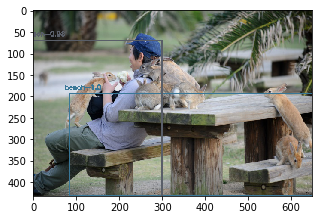

In [46]:
import cv2
import argparse
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

class yolo:
    def __init__(self):
        self.weights_file = '/home/amin/Documents/raspbery/yolo/yolov3.weights'
        self.classes_file = '/home/amin/Documents/raspbery/yolo/yolov3.txt'
        self.config_file = '/home/amin/Documents/raspbery/yolo/yolov3.cfg'
        self.classes = None
        with open(self.classes_file) as f:
            self.classes = [line.strip() for line in f.readlines()]
        self.COLORS = np.random.uniform(0, 255, size=(len(self.classes), 3))
        self.net = cv2.dnn.readNet(self.weights_file, self.config_file)

    def get_output_layers(self):
        layer_names = self.net.getLayerNames()
        output_layers = [layer_names[i[0] - 1] for i in self.net.getUnconnectedOutLayers()]
        return output_layers

    def draw_bounding_box(self, img, class_id, confidence, x, y, x_plus_w, y_plus_h):
        label = str(self.classes[class_id])
        color = self.COLORS[class_id]
        cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)
        cv2.putText(img, f"{label}-{confidence:1.2}", (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    def set_image(self, image_file, result_size=5):
        self.image = cv2.imread(image_file)
        #self.image = image
        self.Width = self.image.shape[1]
        self.Height = self.image.shape[0]
        scale = 0.00392
        blob = cv2.dnn.blobFromImage(self.image, scale, (416,416), (0,0,0), True, crop=False)
        self.net.setInput(blob)

        outs = self.net.forward(self.get_output_layers())
        class_ids = []
        confidences = []
        boxes = []
        conf_threshold = 0.5
        nms_threshold = 0.4

        for out in outs:
            for detection in out:
                scores = detection[5:]
                class_id = np.argmax(scores)
                confidence = scores[class_id]
                if confidence > 0.5:
                    center_x = int(detection[0] * self.Width)
                    center_y = int(detection[1] * self.Height)
                    w = int(detection[2] * self.Width)
                    h = int(detection[3] * self.Height)
                    x = center_x - w / 2
                    y = center_y - h / 2
                    class_ids.append(class_id)
                    confidences.append(float(confidence))
                    boxes.append([x, y, w, h])
        
        # apply non-max suppression
        indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

        # go through the detections remaining
        # after nms and draw bounding box
        for i in indices:
            i = i[0]
            box = boxes[i]
            x = box[0]
            y = box[1]
            w = box[2]
            h = box[3]

            self.draw_bounding_box(self.image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))
            print(f"{self.classes[class_ids[i]]} with confidence {confidences[i]:1.2}")

        img = cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB)
        fig2=plt.figure(figsize=[result_size, result_size])
        a = plt.imshow(img)
        #cv2.imwrite("object-detection.jpg", image)

        
y = yolo()
y.set_image(image_file = '/home/amin/Documents/raspbery/yolo/t6.jpg')

person with confidence 1.0
bird with confidence 0.99
bird with confidence 0.99
bird with confidence 0.96
bird with confidence 0.95
bird with confidence 0.95
bird with confidence 0.87
bird with confidence 0.86
bird with confidence 0.84
bird with confidence 0.83
bird with confidence 0.78
bird with confidence 0.76
bird with confidence 0.71
bird with confidence 0.63


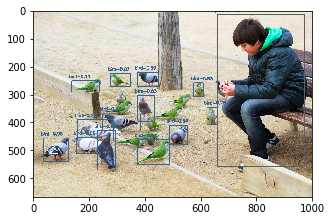

In [49]:
y.set_image(image_file = '/home/amin/Documents/raspbery/yolo/Wild-parrots-Spain.jpg')

person with confidence 0.99
person with confidence 0.99
person with confidence 0.93
cow with confidence 0.87
dog with confidence 0.85
dog with confidence 0.78
horse with confidence 0.66
car with confidence 0.53


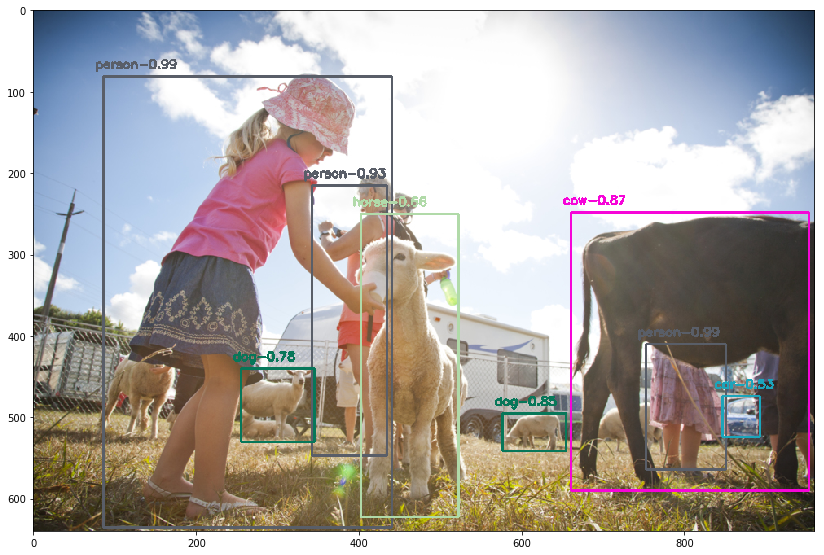

In [48]:
y.set_image(image_file = '/home/amin/Documents/raspbery/yolo/t4.jpg', result_size=14)